In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datos_salud.csv')
data.head()

,edad,imc,fuma,ejercicio,riesgo_alto
0,58,12.034931,1,0,1
1,48,20.902449,0,0,0
2,34,23.989727,0,0,0
3,62,20.008867,0,1,0
4,27,31.529645,1,1,1


In [3]:
X = data[['edad', 'imc', 'fuma', 'ejercicio']]
y = data['riesgo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalizamos para mejorar el entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# MLPClassifier = Multilayer Perceptron (red neuronal densa)
mlp = MLPClassifier(
    hidden_layer_sizes=(8, 4),  # dos capas ocultas: 8 y 4 neuronas
    activation='relu',           # función de activación ReLU
    solver='adam',               # optimizador basado en gradiente descendente adaptativo
    learning_rate_init=0.01,     # tasa de aprendizaje inicial
    max_iter=500,                # número máximo de iteraciones (épocas)
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 4), learning_rate_init=0.01, max_iter=500,
              random_state=42)

In [6]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



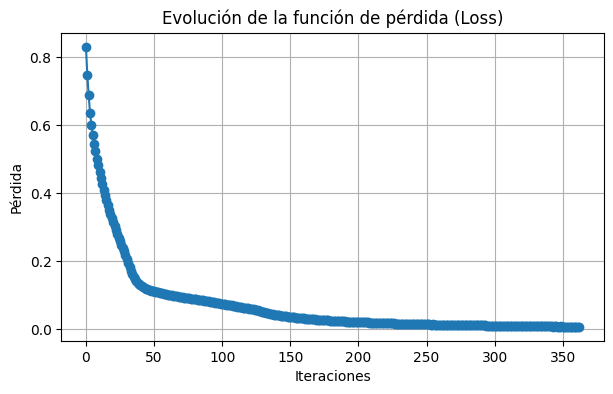

In [9]:
plt.figure(figsize=(7,4))
plt.plot(mlp.loss_curve_, marker='o')
plt.title('Evolución de la función de pérdida (Loss)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()